# What's in a neural net?

A neural net is simply a series of linear regressions with a nonlinear layer.

## Linear regression refresher

We want to draw a line through some data

In [10]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (30, 20)
plt.rcParams['font.size'] = 24
plt.rcParams['lines.markersize'] = 20

In [11]:
from sklearn.datasets import make_regression
seed = 42

In [12]:
Xs, ys, coef = make_regression(n_features=1, noise=20, coef=True, random_state=42)

In [13]:
def draw_scatter(m=None, b=None):
    fig, ax = plt.subplots()
    ax.scatter(Xs, ys)
    ax.set_ylabel('Y')
    ax.set_xlabel('X')
    ax.set_title('Some data')
    return ax

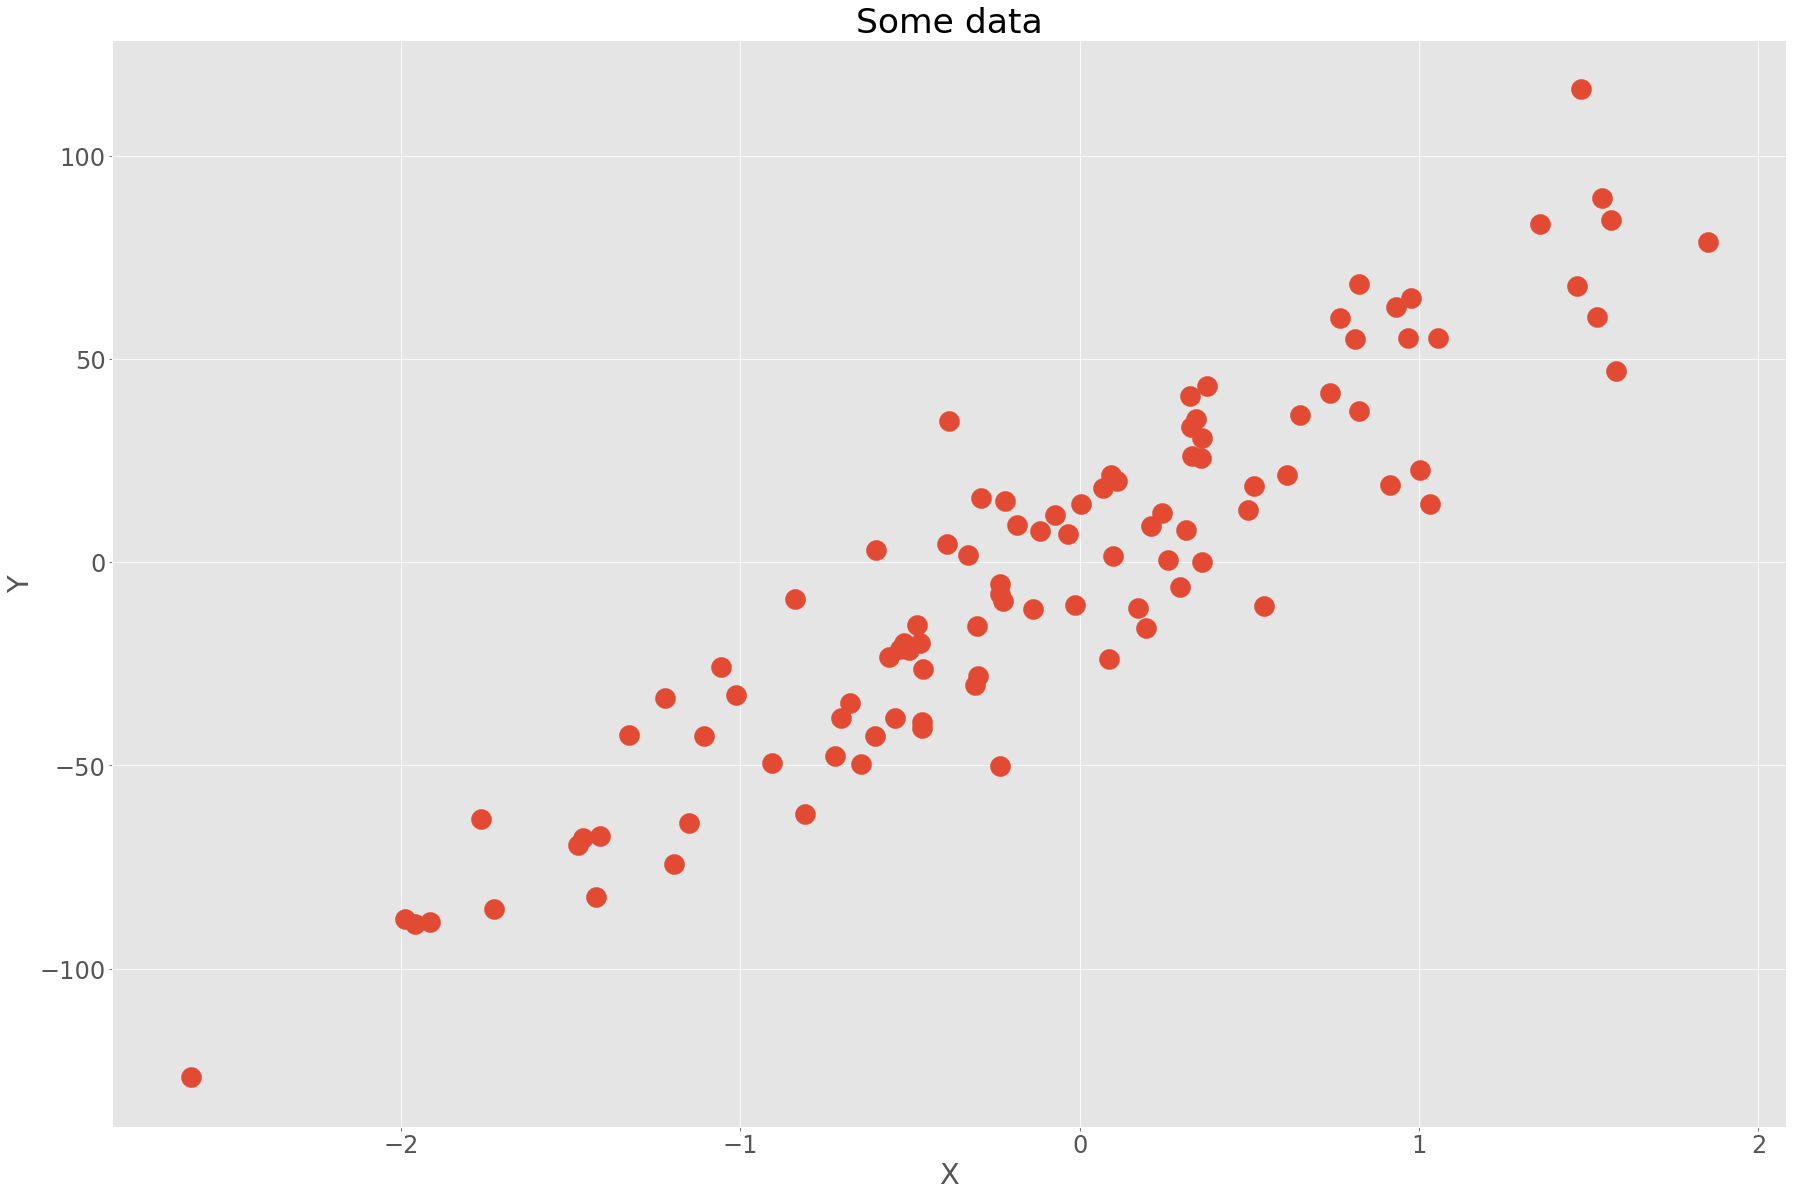

In [14]:
draw_scatter()

How do we draw a line through this data that "best fits"? What does "best fit" mean?

Let's start by defining a line - a line is defined by $ y = mx + b $

In [15]:
def draw_regression_line(m, b, ax=None):
    if ax is None:
        fig, ax = plt.subplots()
    ax.plot(Xs, regression_line(m, b))
    ax.set_title(f'Regression Line: m = {m} b = {b}')
    return ax

In [16]:
def regression_line(m, b):
    return m*Xs + b

We can now start plugging numbers into $m$ and $b$

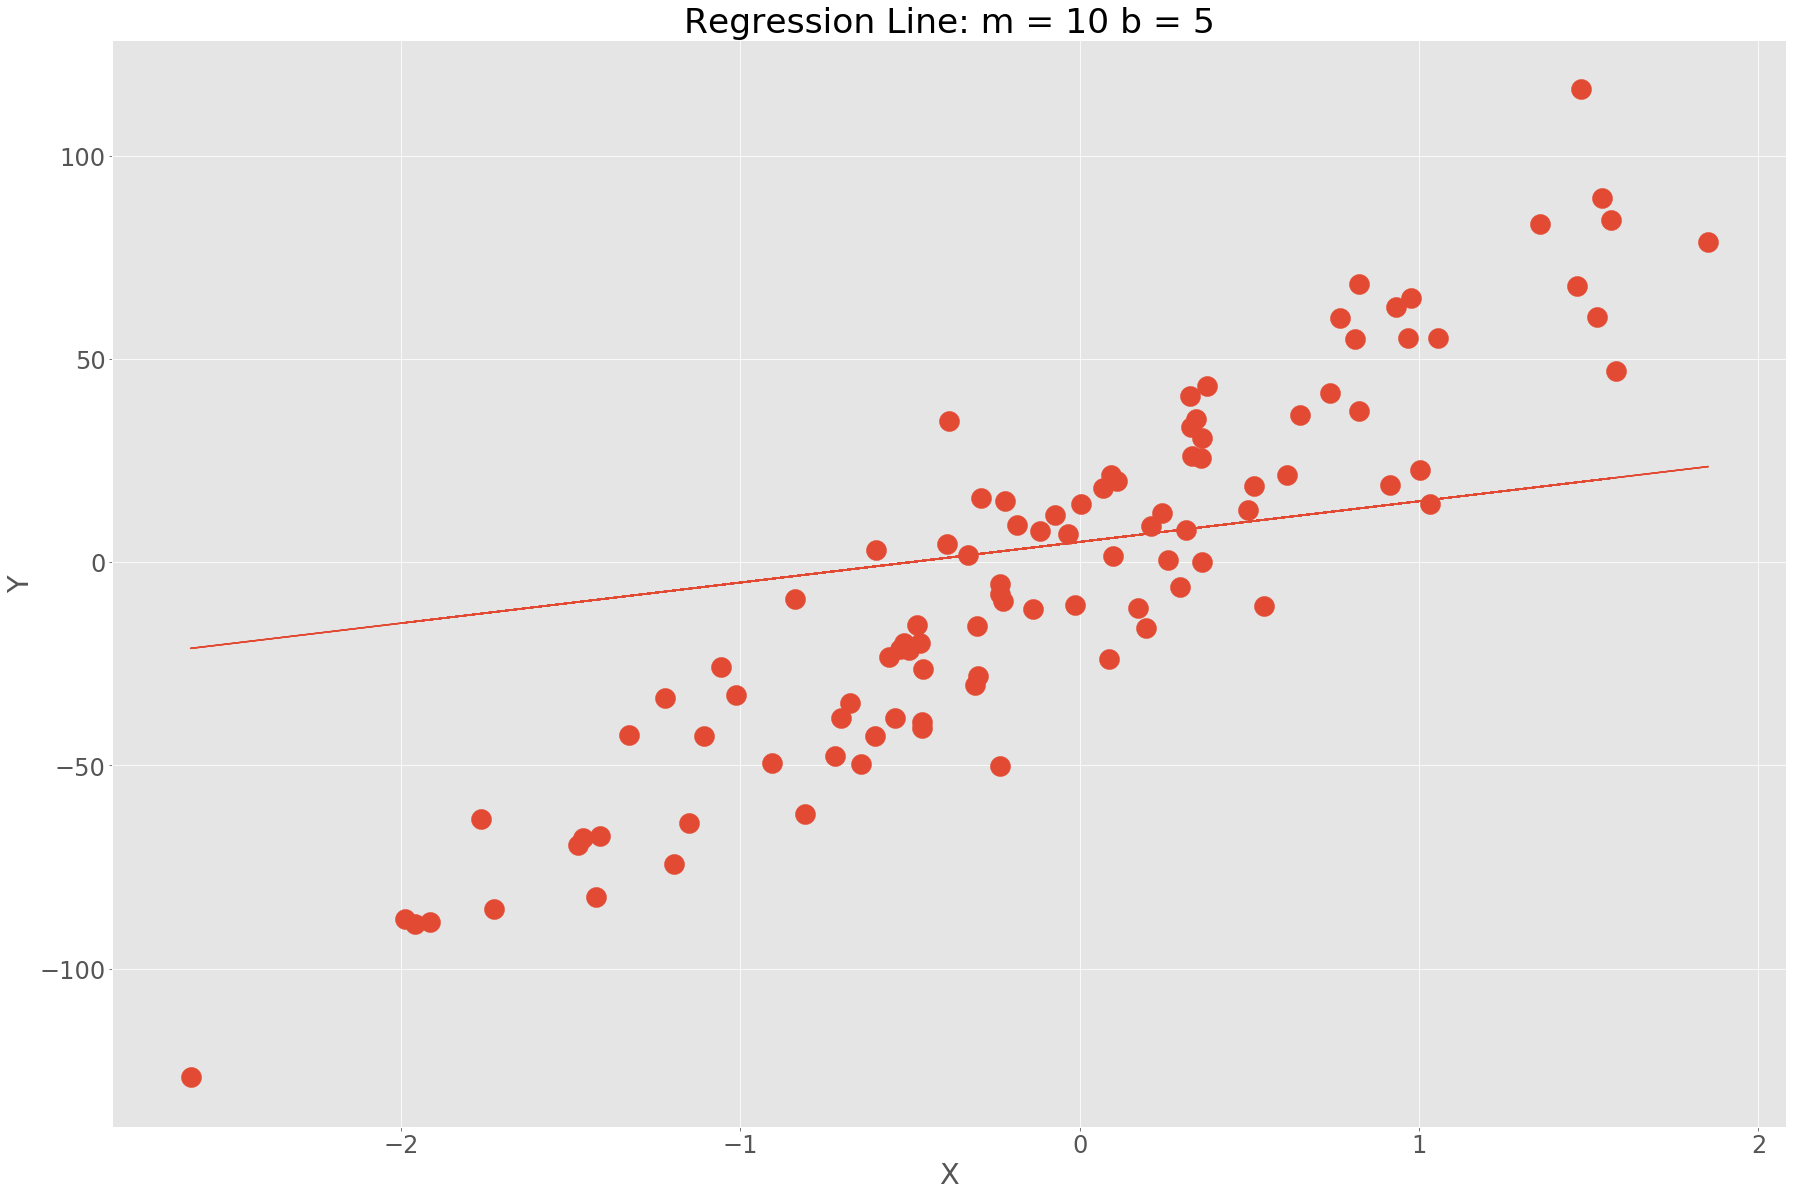

In [17]:
ax = draw_scatter()
draw_regression_line(10, 5, ax);

Is that a good line or a bad line?

Let's try another value

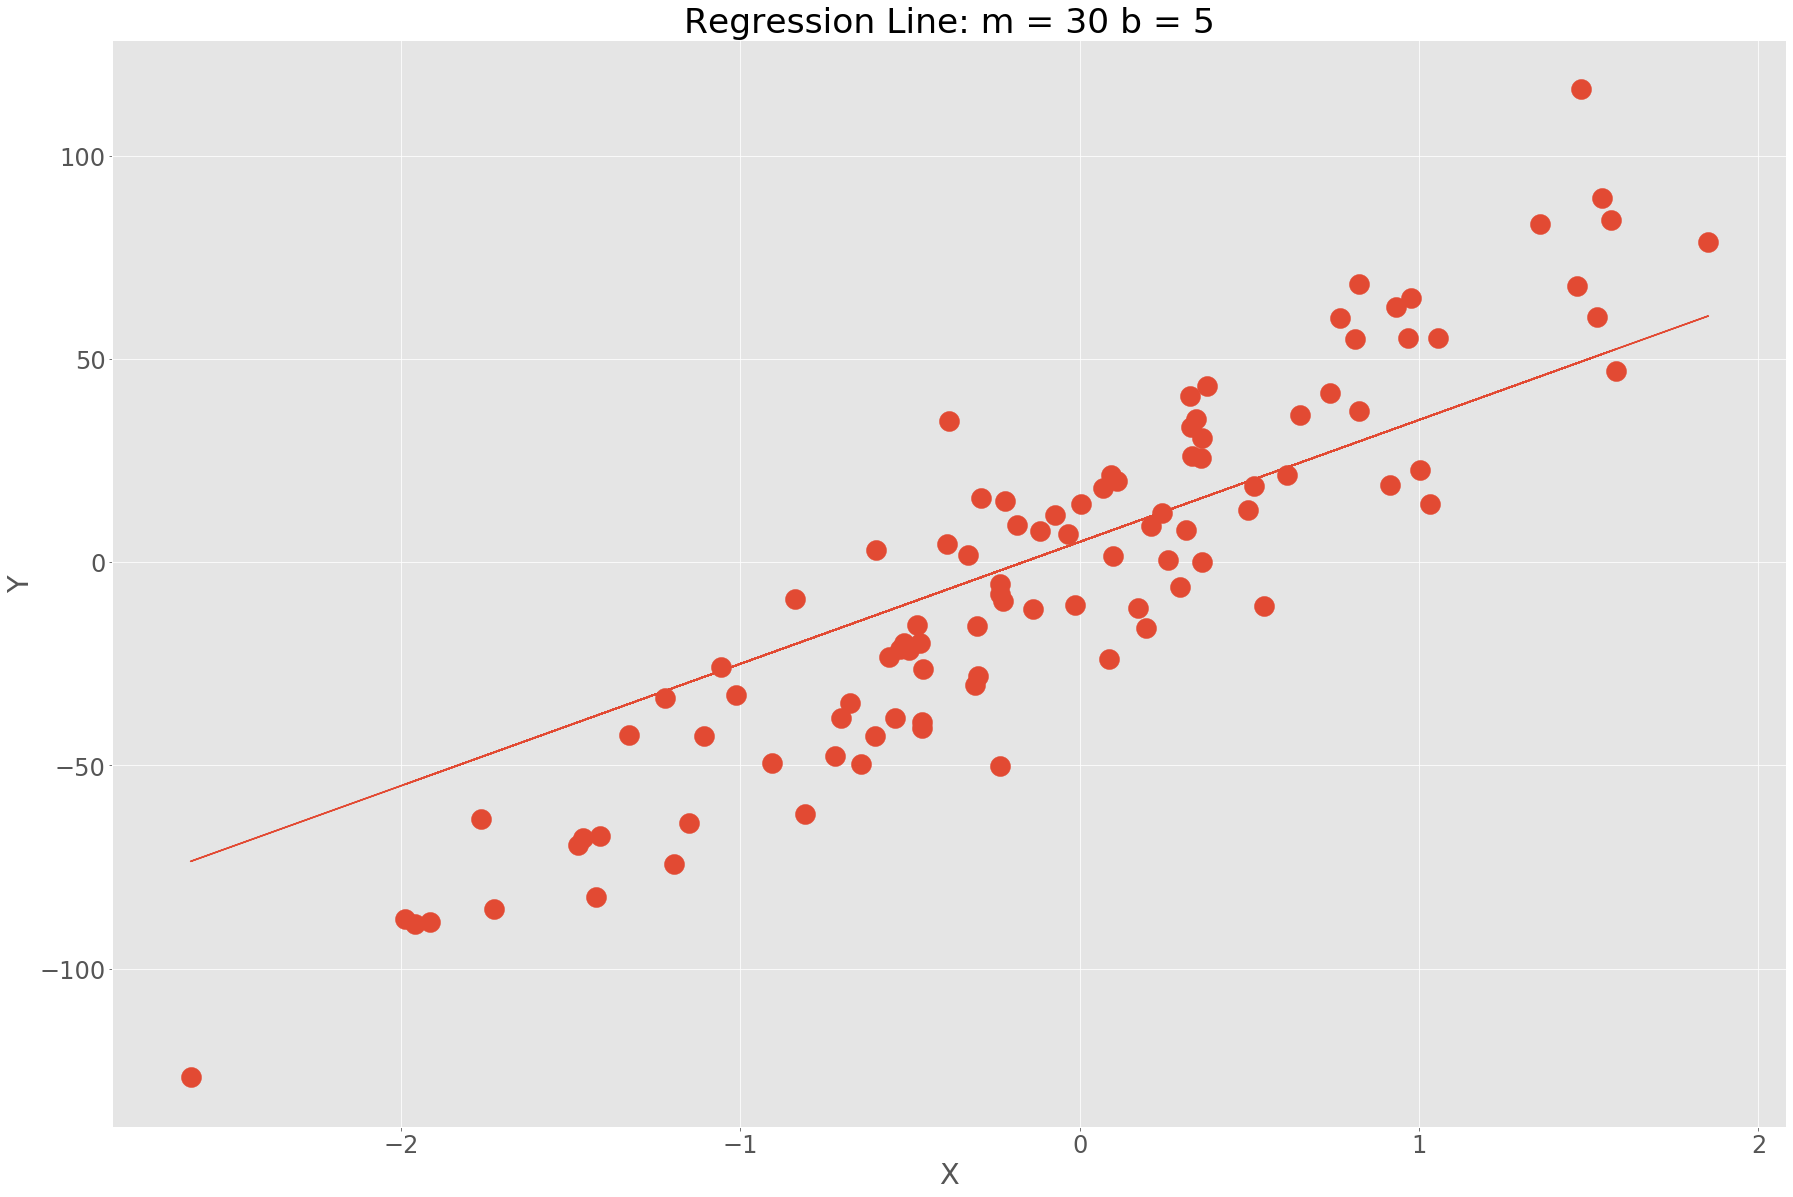

In [18]:
ax = draw_scatter()
draw_regression_line(30, 5, ax)

That seems better, no?

Intuitively, we can look at a line going through these dots and say it fits better - but computers can't do that. We need some way to quantify how good or bad a line is. 

# The Loss Function

The loss function can be anything you can dream up - the only criteria is that it quantifies how good or bad the guess is (and that it's **differentiable** - we'll get into that in a bit)

For a linear regression, we often measure the distance each point is from the line. On average, the further the points are away from the line, the worse the line is. We have a decision to make though - what do we do about negative distances? If we take the mean of positive and negative numbers, we are in effect saying that it's okay that this point is wrong as long as another point is equally wrong in a different direction - that sounds a bit silly, no?

We will choose to **square** the error in this case, as this gives us a dual benefit - we get rid of negative numbers, but we also **penalize** large mistakes more than small mistakes. So now we have decided on our loss function - **mean squared error**

$$ \frac{1}{n} \sum_{n=1}^{n}(\hat y_i - y_i)^2 $$

In [19]:
def mean_squared_error(y_hat, y):
    return (np.sum(y_hat - y) ** 2) / len(y)

In [20]:
error_1 = mean_squared_error(regression_line(30, 5), ys)
error_1

19793571.01656026

In [21]:
error_2 = mean_squared_error(regression_line(10, 5), ys)
error_2

42587722.92476668

In [22]:
error_1 > error_2

False

We now have the ability to ask our computer to compare any pairs of m, b and tell us if we have a better line or worse - that's powerful!

However, we still have infinite possible combinations of m and b to compare - where do we go from here?

In [23]:
def draw_error_curve():
    fig, ax = plt.subplots()
    ms = np.arange(-100, 100)
    preds = [regression_line(m, 0) for m in ms]
    errors = [mean_squared_error(pred, ys) for pred in preds]
    ax.plot(ms, errors, linewidth=10)
    ax.set_ylabel('Mean Squared Error')
    ax.set_xlabel('Value of $M$')
    return ax

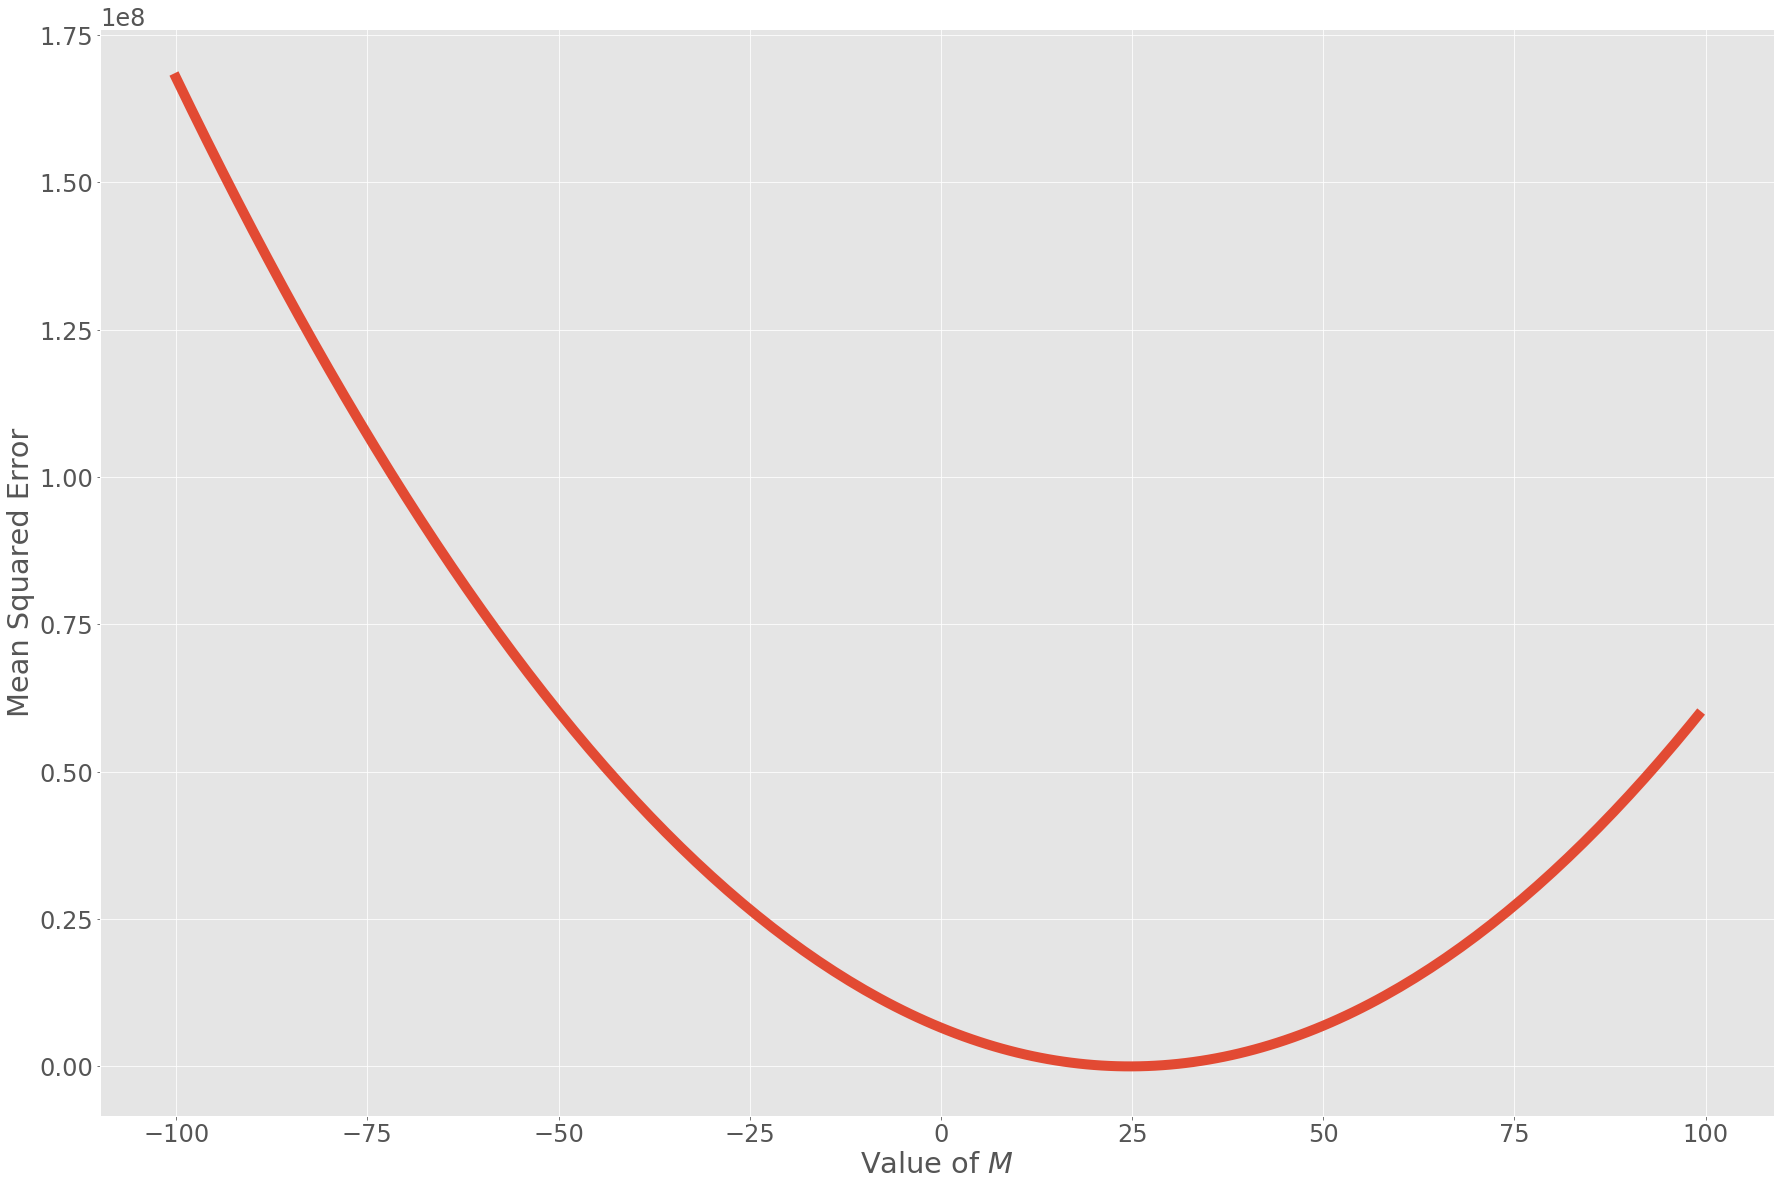

In [24]:
draw_error_curve()

We can see that as we change m, the error value changes, so we get this bowl shape - we want to get to the bottom!

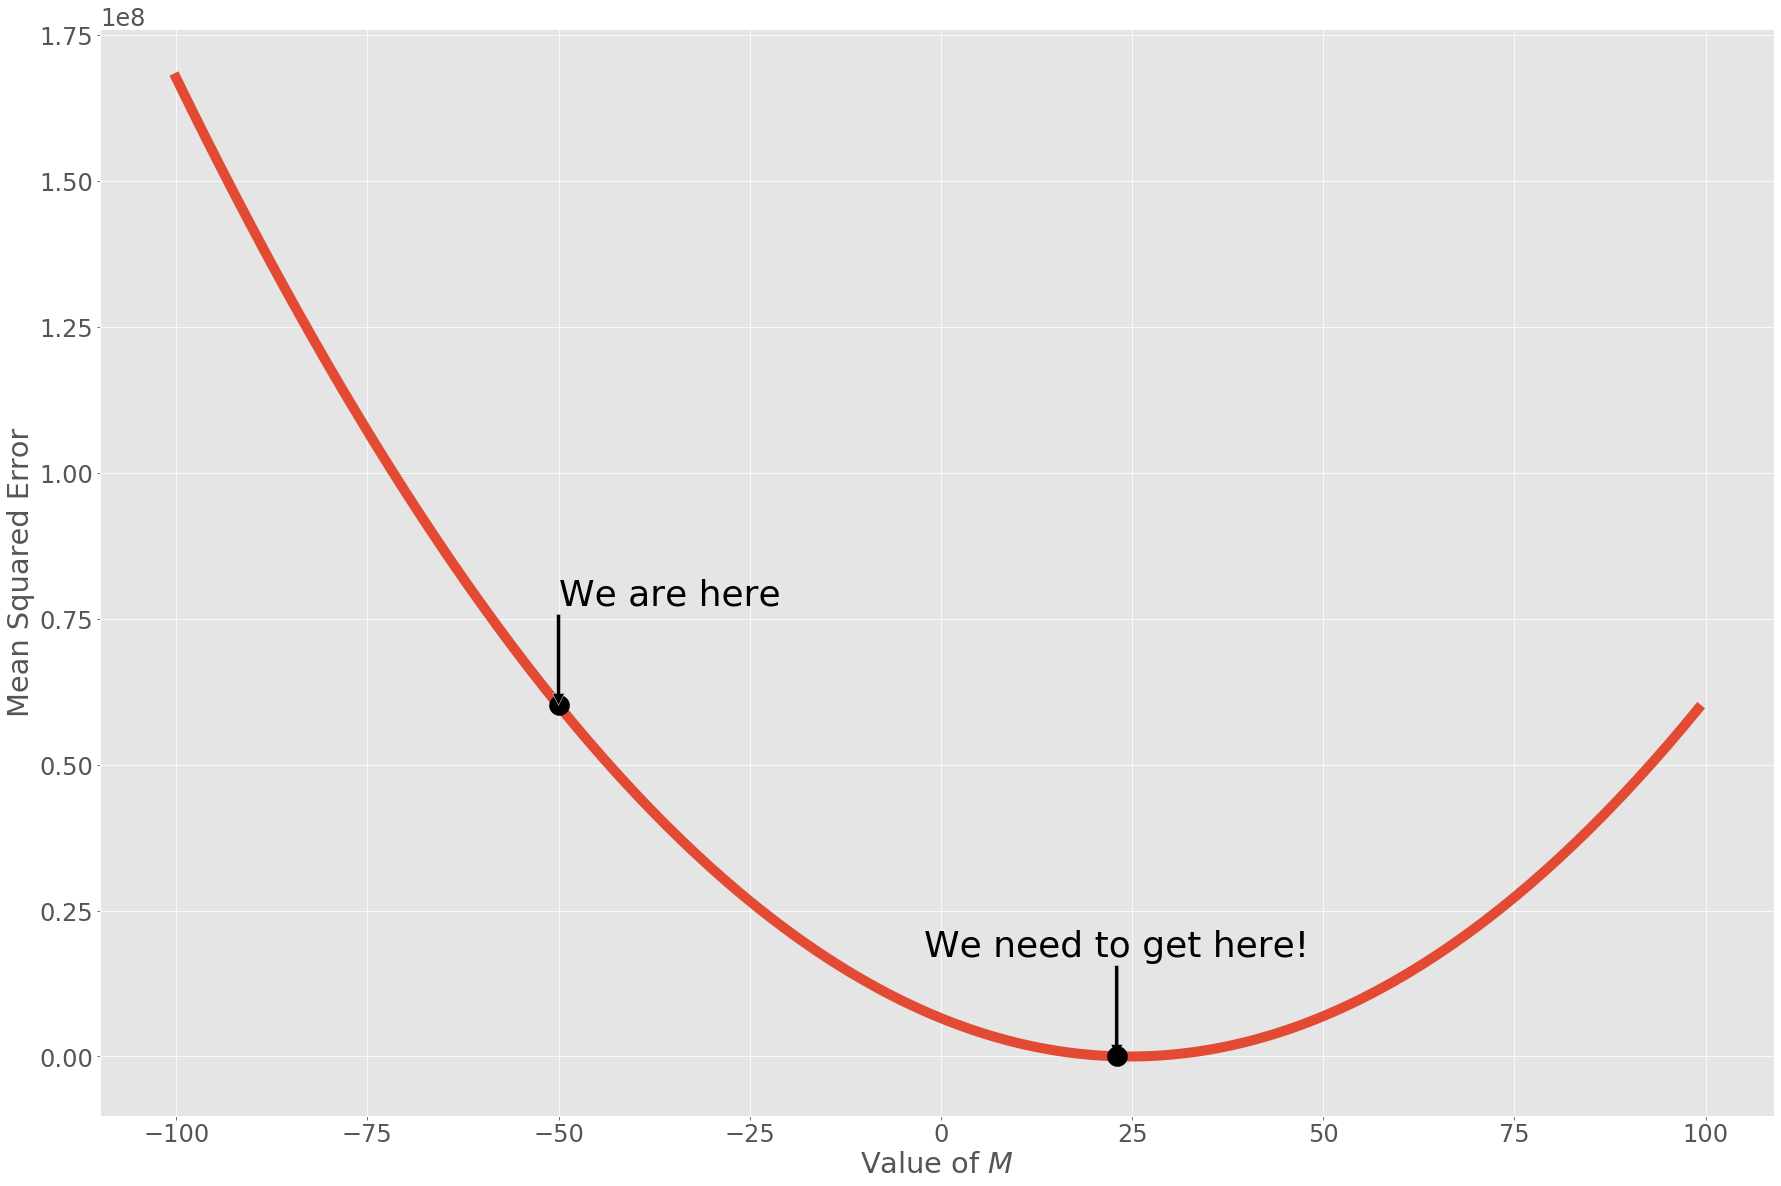

In [25]:
ax = draw_error_curve()
error = mean_squared_error(regression_line(-50, 0), ys)
ax.annotate('We are here', (-50, error), 
             xytext=(0, 100), 
             textcoords='offset points', 
             arrowprops={'facecolor': 'black'},
            fontsize=36)
ax.scatter(-50, error, c='black', zorder=3)

ax.scatter(23, 0, c='black', zorder=4)
ax.annotate('We need to get here!', 
             (23, 0), 
             xytext=(0, 100), 
             textcoords='offset pixels',
            arrowprops={'facecolor': 'black'},
             ha='center',
            fontsize=36);
plt.savefig('images/annotated_error_curve.png', bbox_inches='tight')

One way we can find our way down the hill is to take one step in a given direction and see if we are any closer to where we want to be - we are *descending* the error curve. How do we know that we are getting closer to the flat bit? 

Calculus to the rescue! Calculus gives us a tool to find how steep any given point of a curve is - differentiation! We can take the gradient of the curve, so we can figure out which way is down towards the flat bit. If the slope is negative, we want to take a step in the positive direction and vice versa. We want to *descend* the error curve by taking the *gradient* - Gradient Descent!

Another way of thinking of it, taking the gradient is the same as asking, if I change the value of $m$ a tiny bit, how does that affect my error? Remember, we want to change $m$ so the error goes down

In addition, since we know how steep it is, we can make the assumption that the steeper it is, the further away the flat bit is, so we take a bigger step

If we do that over and over again, we eventually get to the bottom, giving us the best value for $m$!

# It's regressions all the way down!

You now have all the knowledge to start understanding how a neural network works! If you can understand how a linear regression works, you can understand how neural nets work.

Let's put this into practice and build one from scratch!